## Fandang Movie Rating Analysis

The goal is to develop as much competence as possible with data visualization and hypothesis proving by hacking the Fandango movie database from https://github.com/fivethirtyeight/data/blob/master/fandango/fandango_score_comparison.csv

In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv( "fandango_score_comparison.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [4]:
data.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
def df_bar_all( df, nmax=15 ) :
    """dataframe,int --> nothing - just plots"""
    # nmax : if not a numeric column, then only plot if less than nmax unique values
    for col in df.columns :
        if pd.api.types.is_numeric_dtype( df[col] ) :
#             (df[col].value_counts(bins = 10, normalize = True).sort_index() * 1 ).plot(kind='hist', title=col, rot=30)
            df[col].plot(kind='hist', title=col, rot=30)
            to_plot = True
        elif len( df[col].unique() ) < 15 :
            (df[col].value_counts(normalize=True).sort_index()*100).plot(kind='bar',rot=30,title=col)
            to_plot = True
        else :
            to_plot = False
        if to_plot :
            plt.xticks( ha='right')
            plt.ylabel( '%' )
            plt.show()

### Now, let's just do an exploratory data plot - histograms of all columns so we have a sense of what the data look like.. We're lucky it's already cleaned - going by all columns numeric and no nulls

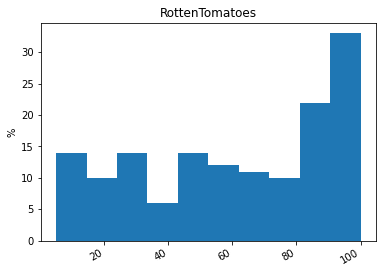

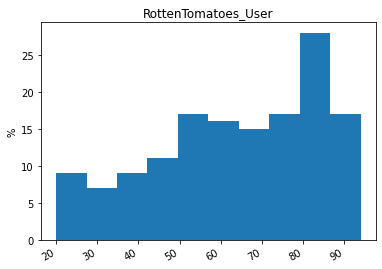

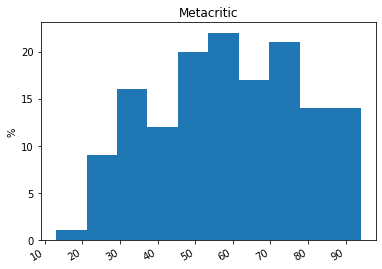

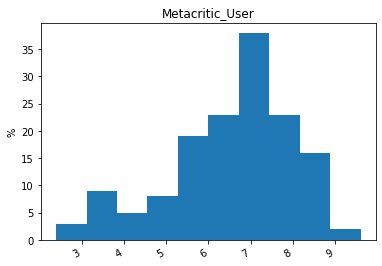

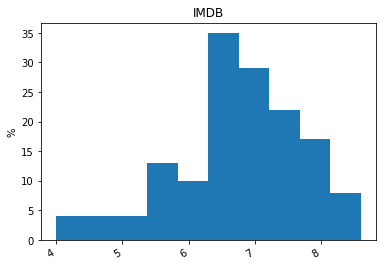

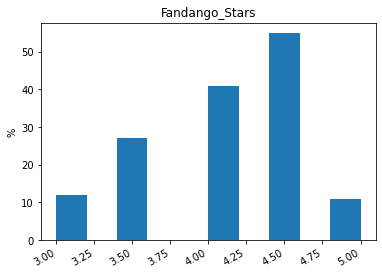

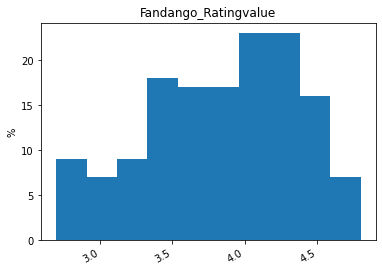

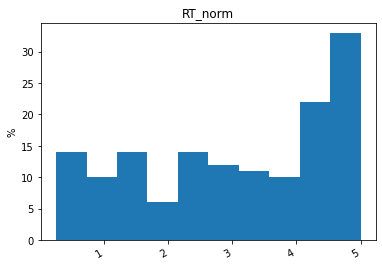

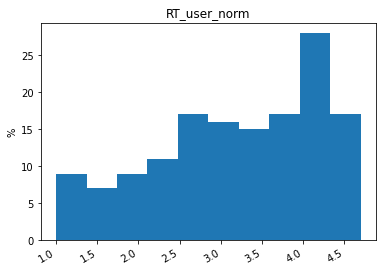

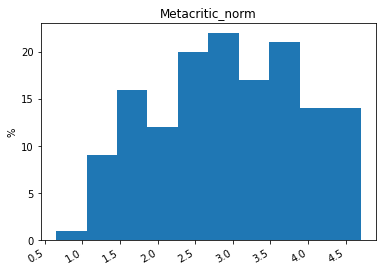

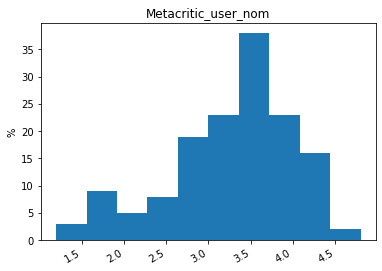

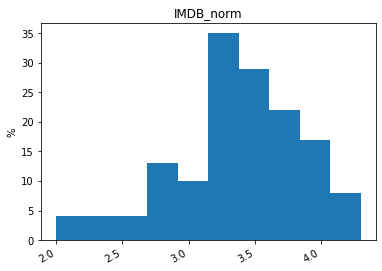

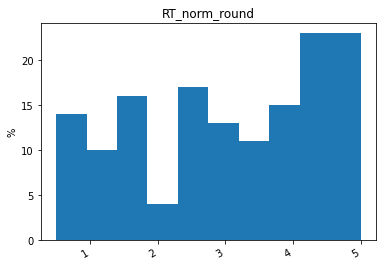

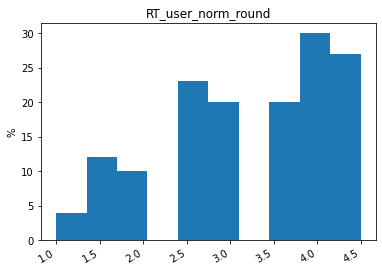

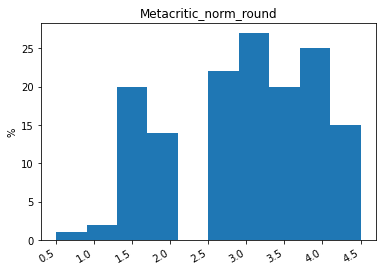

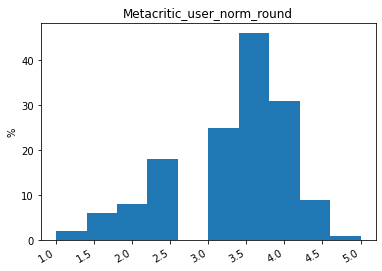

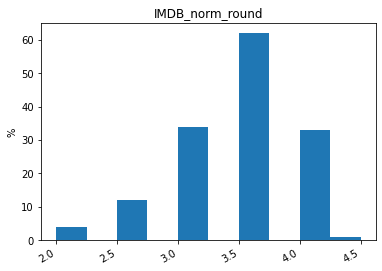

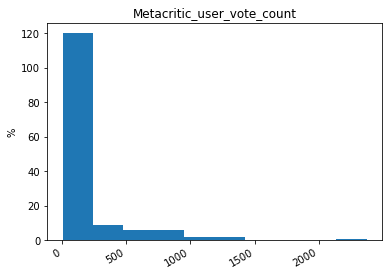

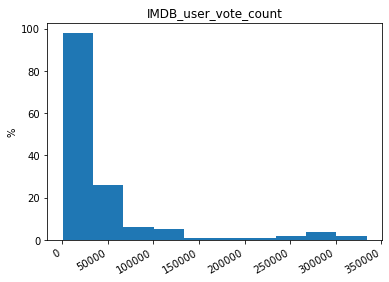

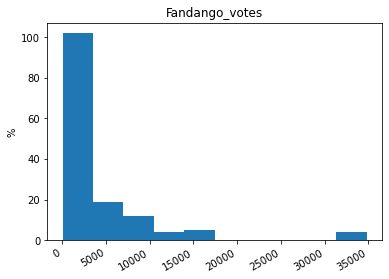

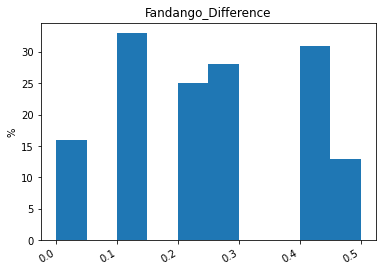

In [6]:
df_bar_all( data )

We can see from the normalized ratings for RT, Metacritic, etc that they do have a much lower extent than Fandango does. So that part of the hypothesis - that Fandango thinks much higher of movies in general is true, already.. As I got into the guided project, I learnt that the actual goal was to investigate if Fandango "fixed" their system to remove the bias after Hickey's article was published. The data for that is from Alex Oltenau

In [7]:
newd = pd.read_csv("movie_ratings_16_17.csv")
newd.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


The first comment is that that data has been compiled poorly - since we are going to compare with an existing dataset, care should have been taken to use the same format - same column names, etc.

In [8]:
useful_old = data[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
new_useful = newd[['movie', 'year', 'fandango']]

In [9]:
useful_old.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


#### DQ sagt :
By reading the README.md files of the two repositories, figure out whether the two samples are representative for the population we're trying to describe.
- Determine whether the sampling is random or not — did all the movies have an equal chance to be included in the two samples?
- Useful information can also be found in Hickey's article.
You can acess the two README.md files directly using this link and this link.

Really? I want to learn how to analyze data and I'm supposed to be manually scraping a website looking for whether the sampling was truly random? No thanks. How about capturing the relevant data that can be used to answer the question within the dataset?

Now, we're supposed to (I think) check that all movies have at least 30 ratings, in the Fandango system..
> Check if both samples contain popular movies — that is, check whether all (or at least most) sample points are movies with over 30 fan ratings on Fandango's website.

In [10]:
useful_old.loc[ useful_old['Fandango_votes'] > 30 , 'Fandango_votes'].value_counts(bins = 10 )

(0.188, 3516.1]       102
(3516.1, 6997.2]       19
(6997.2, 10478.3]      12
(13959.4, 17440.5]      5
(31364.9, 34846.0]      4
(10478.3, 13959.4]      4
(27883.8, 31364.9]      0
(24402.7, 27883.8]      0
(20921.6, 24402.7]      0
(17440.5, 20921.6]      0
Name: Fandango_votes, dtype: int64

In [11]:
useful_old.shape

(146, 5)

I say, "yes", we do have a sufficient number of movies with more than 30 votes..

In [12]:
useful_old.sort_values('Fandango_votes').head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
39,Maps to the Stars (2015),3.5,3.1,35,0.4
122,Tangerine (2015),4.0,3.9,36,0.1
43,The Diary of a Teenage Girl (2015),4.0,3.6,38,0.4
71,The Wrecking Crew (2015),4.5,4.2,38,0.3
145,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,0.0


In [13]:
new_2015s = new_useful[ new_useful['year'] == 2015 ]
new_2016s = new_useful[ new_useful['year'] == 2016 ]
print( new_2015s.shape )
print( new_2016s.shape )

(0, 3)
(191, 3)


So, what's the big idea? There are about 15 movies from 2017 and none in 2015. I was expecting better going by Alex's narrative :

> If you explore the data sets enough, you'll notice that some movies were not released in 2015 and 2016. We need to isolate only the sample points that belong to our populations of interest.
- Isolate the movies released in 2015 in a separate data set.
- Isolate the movies released in 2016 in another separate data set.

These are the data sets we'll use next to perform our analysis.

Okay, it looks like we're to assume that the Fandango dataset applies to 2015 movies. Not sure where to confirm that though..

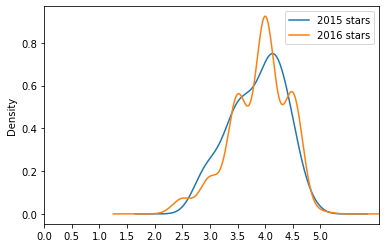

In [14]:
useful_old['Fandango_Ratingvalue'].plot.kde( label="2015 stars" , legend=True, xlim = (0.5))
new_2016s['fandango'].plot.kde( label="2016 stars", legend=True , xlim = (0.5) )
plt.xticks( [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

Ok, why does the plot extend beyond 5 after we've explicitly set xlim?

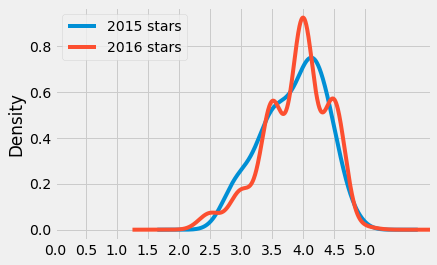

In [15]:
# apparently there's some secret sauce I didn't know about :
plt.style.use('fivethirtyeight')
useful_old['Fandango_Ratingvalue'].plot.kde( label="2015 stars" , legend=True, xlim = (0.5))
new_2016s['fandango'].plot.kde( label="2016 stars", legend=True , xlim = (0.5) )
plt.xticks( [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

Now, for a die-hard fan of thick lines for wire-highlighting and plotting in Cadence, these thick lines are a real treat!

When I sneak a peek at Alex's notebook, I see that his "old" plot is not as smooth as the new one - and, when I take a closer look - he's actually pulled the 2015 movies out of the old Fandango (Hickey) dataset - the year is there - in the name of the movie - so one could have just used str.match in a smart way to create the Year column..

Okay, a bit of rookieness, you can use range for the xticks. And the answer to the x-limits question - you need plt.xlim separately, so.. Actually, that one might just be the typo 0.5 instead of 0,5   
First of all, let's get the year from the old dataset..

In [16]:
data['FILM'].replace({'^.+\D(201\d)\D.*$' : r'\1'}, regex=True ).head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: FILM, dtype: object

In [17]:
data['Year'] = data['FILM'].replace({'^.+\D(201\d)\D.*$' : r'\1'}, regex=True )

So, now, with the benefit of hindsight...

In [18]:
useful_old = data.loc[ data['Year'] == 2015, ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
useful_old.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference


In [19]:
useful_old.shape

(0, 5)

OK :) and?...

In [20]:
data.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5,2015
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5,2015
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5,2015
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5,2015


In [21]:
data['Year'] == '2015'

0       True
1       True
2       True
3       True
4       True
       ...  
141     True
142     True
143    False
144     True
145     True
Name: Year, Length: 146, dtype: bool

OK, the short answer is that python is not as smart as Perl..

In [22]:
useful_old = data.loc[ data['Year'] == '2015', ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

And, using the hindsight..

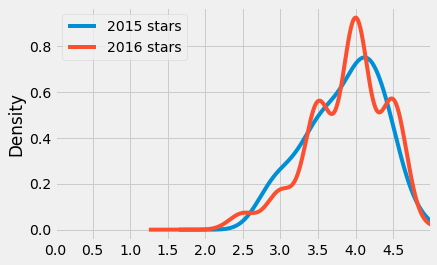

In [23]:
# apparently there's some secret sauce I didn't know about :
plt.style.use('fivethirtyeight')
useful_old['Fandango_Ratingvalue'].plot.kde( label="2015 stars" , legend=True, xlim = (0,5))
new_2016s['fandango'].plot.kde( label="2016 stars", legend=True , xlim = (0,5) )
plt.xticks( np.arange(0,5,0.5))
plt.show()

In [24]:
useful_old.shape

(129, 5)

Okay, so I don't know how he got the kinks in his 2015 plot..

Looks like I just plotted the wrong thing - I needed Fandango_Stars

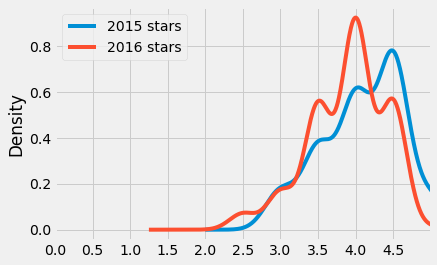

In [25]:
plt.style.use('fivethirtyeight')
useful_old['Fandango_Stars'].plot.kde( label="2015 stars" , legend=True, xlim = (0,5))
new_2016s['fandango'].plot.kde( label="2016 stars", legend=True , xlim = (0,5) )
plt.xticks( np.arange(0,5,0.5))
plt.show()

Phew :)

In [26]:
useful_old['Fandango_Stars'].value_counts( normalize=True).sort_index()

3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64

In [27]:
new_2016s['fandango'].value_counts( normalize=True).sort_index()

2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: fandango, dtype: float64

In [28]:
useful_old['Fandango_Stars'].mean()

4.0852713178294575

In [29]:
useful_old['Fandango_Stars'].median()

4.0

In [30]:
useful_old['Fandango_Stars'].mode()

0    4.5
dtype: float64

In [31]:
new_2016s['fandango'].mean()

3.887434554973822

In [32]:
new_2016s['fandango'].median()

4.0

In [33]:
new_2016s['fandango'].mode()

0    4.0
dtype: float64

In [34]:
summary = pd.DataFrame( columns=['year', 'mean', 'median','mode'] )
summary = summary.append( { 'year' : '2015', 'mean' : 4.0852713178294575, 'median' : 4.0, 'mode' : 4.5}, ignore_index=True )
summary = summary.append( { 'year' : '2016', 'mean' : 3.887434554973822, 'median' : 4.0, 'mode' : 4.0}, ignore_index=True )

In [35]:
summary

,year,mean,median,mode
0,2015,4.085271,4.0,4.5
1,2016,3.887435,4.0,4.0


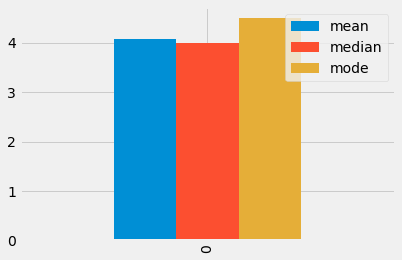

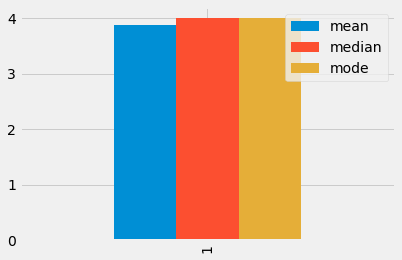

In [36]:
summary[ summary['year']=='2015' ].plot.bar()
summary[ summary['year']=='2016' ].plot.bar()

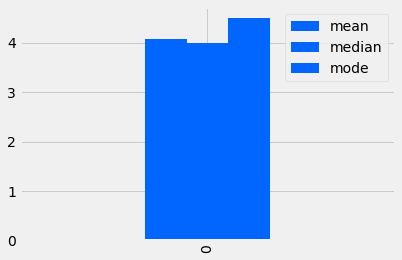

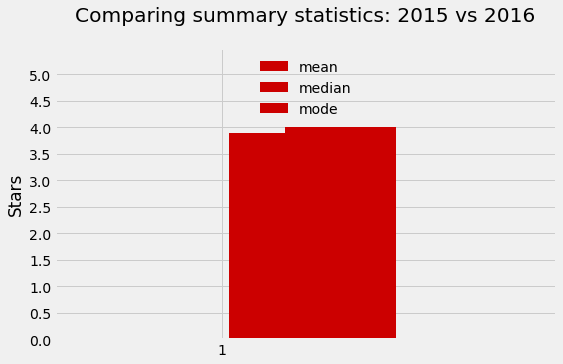

In [37]:
import numpy as np
plt.style.use('fivethirtyeight')
summary[summary['year']=='2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary[summary['year']=='2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

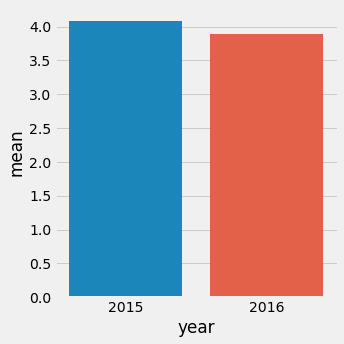

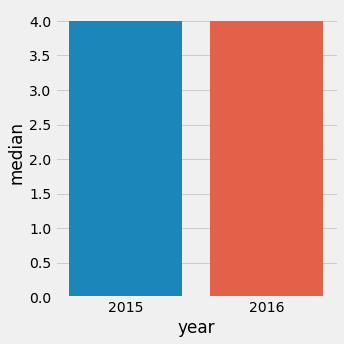

In [38]:
sns.catplot( data=summary, kind='bar', x='year', y='mean')
sns.catplot( data=summary, kind='bar', x='year', y='median')

Not quite what we wanted, eh? :)

C:\Users\anant\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


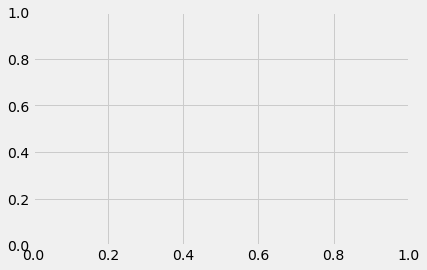

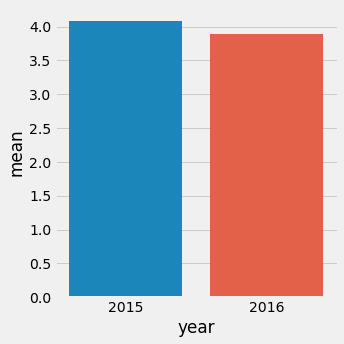

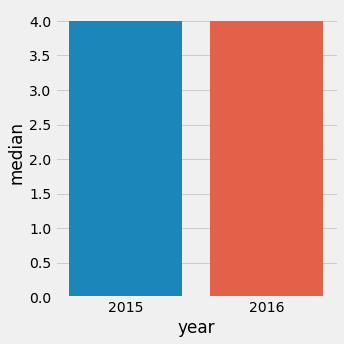

In [39]:
fig, ax = plt.subplots()
sns.catplot( data=summary, kind='bar', x='year', y='mean', ax=ax)
sns.catplot( data=summary, kind='bar', x='year', y='median', ax=ax)

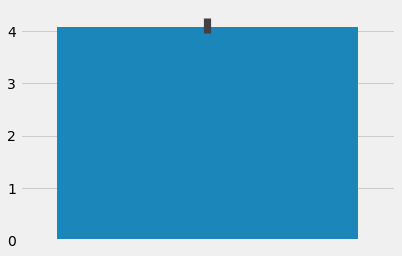

In [40]:
sns.barplot( y=['mean','median','mode'], hue='year', data=summary)

In [41]:
sns.countplot( x = summary[['mean','median']] , hue = summary['year'] , data=summary )

ValueError: could not broadcast input array from shape (2,2) into shape (2)

Needless to say, the above also did not work. The only way to get what I want is to have a single column for year and then a single column for "avg_type" (which contains mean, median, mode) and then another column for value..

Question is, how easily can one get there?


That is, staring with

In [42]:
summary

,year,mean,median,mode
0,2015,4.085271,4.0,4.5
1,2016,3.887435,4.0,4.0


How can you get to :

|        | 2015     | 2016     |
| ------ | -------- | -------- |
| mean   | 4.085271 | 3.887435 |
| median | 4        | 4        |
| mode   | 4.5      | 4        |


If I can just figure this out, the morning will be well spent :) Sort of :)

In [54]:
play = summary.copy()

In [62]:
play.set_index('year')
play.transpose()

,0,1
year,2015,2016
mean,4.08527,3.88743
median,4,4
mode,4.5,4


Nice, that kind of looks like what we want :)

In [63]:
play.pivot( columns='year', values='mean')

year,2015,2016
0,4.085271,NaN
1,NaN,3.887435


That, from Dan Friedman, not exactly what we want.. Searched for pivot without aggregation..

In [66]:
final = play.transpose()
final

,0,1
year,2015,2016
mean,4.08527,3.88743
median,4,4
mode,4.5,4


In [71]:
final.loc['year']

0    2015
1    2016
Name: year, dtype: object

In [73]:
final.columns = final.loc['year']
final = final[1:]
final

year,2015,2016
mean,4.08527,3.88743
median,4,4
mode,4.5,4


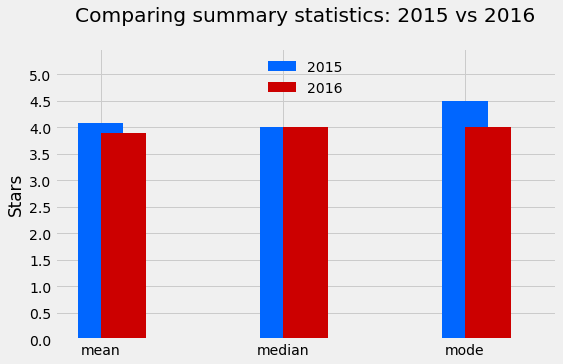

In [75]:
plt.style.use('fivethirtyeight')
final['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
final['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

In [79]:
touse = summary.transpose()[1:]
touse.columns= summary['year']
touse

year,2015,2016
mean,4.08527,3.88743
median,4,4
mode,4.5,4
